In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

import datetime
import plotly.express as px

import plotly
from plotly.graph_objs import Scatter, Line, Layout
 
import importlib
import json
 
from plotly.subplots import make_subplots
import plotly.graph_objects as go


전국확진자수

In [41]:
case=pd.read_csv('Time.csv',usecols=['date','confirmed'])
case=case.sort_values(['date'],ascending=False)
case=case.reset_index()
case=case.drop(['index'],axis=1)

d_c=[]
for i in range(len(case)-1):
    d_c.append(case['confirmed'][i]-case['confirmed'][i+1])
d_c.append(1)

case['daily']=d_c
case=case.sort_values(['date'],ascending=True)
case=case.reset_index()
case=case.drop(['index'],axis=1)

In [9]:
patientinfo=pd.read_csv('PatientInfo.csv')
patientinfo.head(3)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1400000001,female,30s,China,인천,기타,overseas inflow,NaN,NaN,2020-01-19,2020-01-20,2020-02-06,NaN,released
1,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
2,2000000001,male,50s,Korea,경기도,고양시,overseas inflow,NaN,16,NaN,2020-01-26,2020-02-12,NaN,released


서울시 확진자 수만 표기

In [20]:
patientinfo_seoul=patientinfo[patientinfo['province']=='서울']

In [21]:
patient_s=patientinfo_seoul[['confirmed_date','province','infection_case']]
patient_s['cnt']=1
patient_s=patient_s.groupby(['confirmed_date','province'],as_index=False).cnt.sum()
patient_s['cnt_sum']=patient_s.groupby('province')['cnt'].cumsum()

In [22]:
patient_s['confirmed_date']=pd.to_datetime(patient_s['confirmed_date'])

In [23]:
patient_s['주차']=patient_s['confirmed_date'].dt.weekofyear
patient_s['월']=patient_s['confirmed_date'].dt.month

patient_s['월'] = patient_s['월'].apply(lambda x:f'{x}월')
patient_s['주'] = patient_s['주'].apply(lambda x:f'{x}주차')

In [30]:
patient_s

,confirmed_date,province,cnt,cnt_sum,주차,월
0,2020-01-23,서울,1,1,4,1
1,2020-01-30,서울,3,4,5,1
2,2020-01-31,서울,3,7,5,1
3,2020-02-02,서울,1,8,5,2
4,2020-02-05,서울,2,10,6,2
...,...,...,...,...,...,...
124,2020-06-25,서울,17,1267,26,6
125,2020-06-26,서울,17,1284,26,6
126,2020-06-27,서울,14,1298,26,6
127,2020-06-28,서울,7,1305,26,6


In [42]:
fig=px.bar(case,x='date',y='daily')
fig.update_layout(
    title={
        'text': "확진자 추이(전국)",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [34]:
fig=px.bar(patient_s,x='confirmed_date',y='cnt')
fig.update_layout(
    title={
        'text': "지역별 확진자 변화(서울 한정)-달 초/말 로 나눔",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

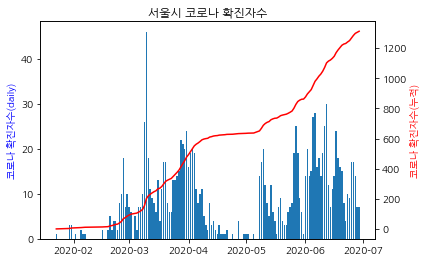

In [39]:
fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(patient_s['confirmed_date'],patient_s['cnt'])
ax2.plot(patient_s['confirmed_date'],patient_s['cnt_sum'],color='r')

ax1.set_label('date')
ax1.set_ylabel('코로나 확진자수(daily)',color='b')
ax2.set_ylabel('코로나 확진자수(누적)', color='r')

plt.title('서울시 코로나 확진자수')

plt.show()

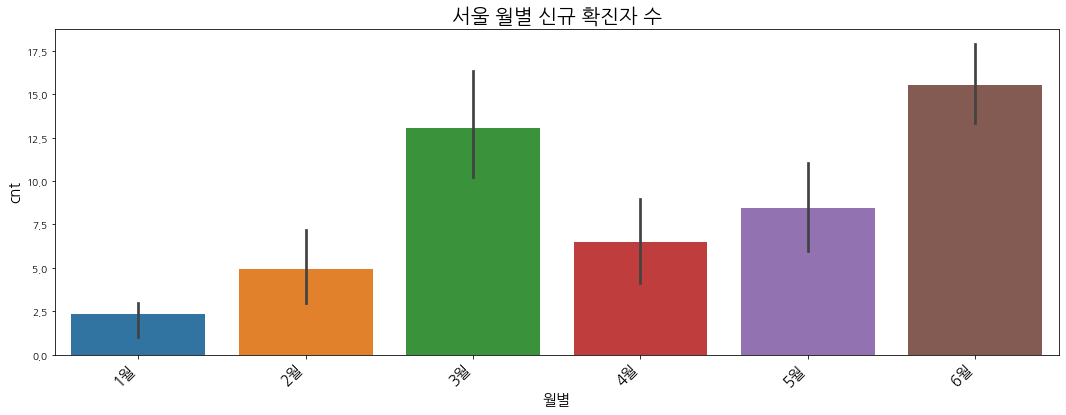

In [37]:
plt.figure(figsize=(18, 6))
pal = sns.color_palette("Blues_d", patient_se.shape[0])
sns.barplot(data=patient_s, x='월', y='cnt')


plt.title(f'서울 월별 신규 확진자 수', size=20)
plt.xticks(rotation=45, size=15, ha='right')
plt.xlabel('월별', size=15)
plt.ylabel('cnt', size=15)
plt.show()

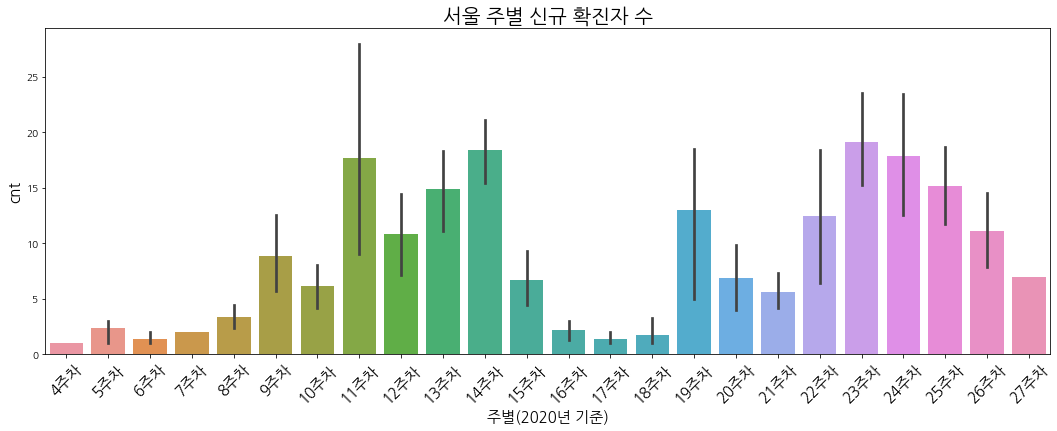

In [38]:

plt.figure(figsize=(18, 6))
"""pal = sns.color_palette("Blues_d", patient_s.shape[0])
rank = patient_s['cnt'].argsort().argsort()"""
sns.barplot(data=patient_s, x='주차', y='cnt')

"""plt.axvline(7, color='red', label='포스트코로나 시작 시점')
plt.axvspan(7, 26.5, facecolor='red', alpha=0.1)
plt.legend(fontsize=15)"""

plt.title(f'서울 주별 신규 확진자 수', size=20)
plt.xticks(rotation=45, size=15)
plt.xlabel('주별(2020년 기준)', size=15)
plt.ylabel('cnt', size=15)
plt.show()


서울 지역별 확진자

In [43]:
patient_seoul=patientinfo_seoul[['province','city','confirmed_date']]
patient_seoul['total_ads']=patient_seoul['province']+' '+patientinfo_seoul['city']
patient_seoul=patient_seoul[['confirmed_date','total_ads']]
patient_seoul['cnt']=1
patient_seoul.head(3)

,confirmed_date,total_ads,cnt
1,2020-01-23,서울 강서구,1
4,2020-01-30,서울 중랑구,1
5,2020-01-30,서울 종로구,1


지역별 daily 확진자수로 구함

누적 확진자수 추가.

In [44]:
patient_seoul=patient_seoul.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()
patient_seoul['cnt_sum']=patient_seoul.groupby('total_ads')['cnt'].cumsum()

In [45]:
fig=px.line(patient_seoul,x='confirmed_date',y='cnt_sum',color='total_ads')
fig.update_layout(
    title={
        'text': "지역별 확진자 변화(서울 한정)",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

daily를 달 초, 말로 분류

In [46]:
#1월 말부터
is_date=patient_seoul['confirmed_date']<'2020-02-01'
patient_seoul_jan=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)

patient_seoul_jan['confirmed_date']='1_2'
patient_seoul_jan=patient_seoul_jan.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()
patient_seoul_jan

,confirmed_date,total_ads,cnt
0,1_2,서울 강서구,1
1,1_2,서울 마포구,1
2,1_2,서울 성북구,1
3,1_2,서울 종로구,3
4,1_2,서울 중랑구,1


In [47]:
#2월 초
is_date_1=patient_seoul['confirmed_date']<'2020-02-15'
patient_seoul_feb_1=patient_seoul[is_date_1]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_feb_1['confirmed_date']='2_1'
patient_seoul_feb_1=patient_seoul_feb_1.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#2월 말
is_date=patient_seoul['confirmed_date']<'2020-03-01'
patient_seoul_feb_2=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_feb_2['confirmed_date']='2_1'
patient_seoul_feb_2=patient_seoul_feb_2.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#3월 초
is_date=patient_seoul['confirmed_date']<'2020-03-16'
patient_seoul_mar_1=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_mar_1['confirmed_date']='3_1'
patient_seoul_mar_1=patient_seoul_mar_1.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#3월 말
is_date=patient_seoul['confirmed_date']<'2020-04-01'
patient_seoul_mar_2=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_mar_2['confirmed_date']='3_2'
patient_seoul_mar_2=patient_seoul_mar_2.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#4월 초

is_date=patient_seoul['confirmed_date']<'2020-04-16'
patient_seoul_apr_1=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_apr_1['confirmed_date']='4_1'
patient_seoul_apr_1=patient_seoul_apr_1.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#4월 말
is_date=patient_seoul['confirmed_date']<'2020-05-01'
patient_seoul_apr_2=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_apr_2['confirmed_date']='4_2'
patient_seoul_apr_2=patient_seoul_apr_2.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#5월 초
is_date=patient_seoul['confirmed_date']<'2020-05-16'
patient_seoul_may_1=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_may_1['confirmed_date']='5_1'
patient_seoul_may_1=patient_seoul_may_1.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#5월 말
is_date=patient_seoul['confirmed_date']<'2020-06-01'
patient_seoul_may_2=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_may_2['confirmed_date']='5_2'
patient_seoul_may_2=patient_seoul_may_2.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#6월 초

is_date=patient_seoul['confirmed_date']<'2020-06-16'
patient_seoul_june_1=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_june_1['confirmed_date']='6_1'
patient_seoul_june_1=patient_seoul_june_1.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

#6월 말
is_date=patient_seoul['confirmed_date']<'2020-07-01'
patient_seoul_june_2=patient_seoul[is_date]
patient_seoul=patient_seoul.drop(patient_seoul[is_date].index)
patient_seoul_june_2['confirmed_date']='6_2'
patient_seoul_june_2=patient_seoul_june_2.groupby(['confirmed_date','total_ads'],as_index=False).cnt.sum()

달별로 나눈걸 병합(그래프 그리기 위해서)

In [48]:
patient_seoul_ads=pd.concat([patient_seoul_jan,patient_seoul_feb_1,patient_seoul_feb_2,patient_seoul_mar_1,patient_seoul_mar_2,
                             patient_seoul_apr_1,patient_seoul_apr_2,patient_seoul_may_1,patient_seoul_may_2,
                             patient_seoul_june_1,patient_seoul_june_2],axis=0)

In [50]:
patient_seoul_ads['cnt_sum']=patient_seoul_ads.groupby('total_ads')['cnt'].cumsum()

In [51]:
fig=px.line(patient_seoul_ads,x='confirmed_date',y='cnt',color='total_ads')
fig.update_layout(
    title={
        'text': "지역별 확진자 변화(서울 한정)-달 초/말 로 나눔",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [52]:
fig=px.line(patient_seoul_ads,x='confirmed_date',y='cnt_sum',color='total_ads')
fig.update_layout(
    title={
        'text': "지역별 확진자 변화(서울/누적)",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [48]:
patient_seoul_mar_1.sort_values('cnt', ascending=False)

,confirmed_date,total_ads,cnt
12,3_1,서울 동대문구,21
6,3_1,서울 구로구,19
18,3_1,서울 양천구,13
3,3_1,서울 강서구,12
4,3_1,서울 관악구,11
21,3_1,서울 은평구,10
19,3_1,서울 영등포구,10
8,3_1,서울 기타,8
13,3_1,서울 마포구,7
16,3_1,서울 성북구,7


In [49]:
patient_seoul_mar_2.sort_values('cnt', ascending=False)

,confirmed_date,total_ads,cnt
0,3_2,서울 강남구,27
3,3_2,서울 관악구,19
10,3_2,서울 동구 구,18
14,3_2,서울 서초구,15
7,3_2,서울 기타,14
5,3_2,서울 구로구,13
17,3_2,서울 송파구,12
20,3_2,서울 용산구,10
12,3_2,서울 마포구,9
13,3_2,서울 서대문구,8
